<a href="https://colab.research.google.com/github/borrowedbirch05/Fast.AI/blob/main/Scene_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!wget "https://faculty.cc.gatech.edu/~hays/compvision2021fall/projects/proj4_data.zip" --no-check-certificate -O data.zip && unzip -qq data.zip

--2024-06-04 00:20:36--  https://faculty.cc.gatech.edu/~hays/compvision2021fall/projects/proj4_data.zip
Resolving faculty.cc.gatech.edu (faculty.cc.gatech.edu)... 130.207.7.122
Connecting to faculty.cc.gatech.edu (faculty.cc.gatech.edu)|130.207.7.122|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 86460586 (82M) [application/zip]
Saving to: ‘data.zip’

data.zip            100%[===================>]  82.46M  78.2MB/s    in 1.1s    

2024-06-04 00:20:37 (78.2 MB/s) - ‘data.zip’ saved [86460586/86460586]



In [ ]:
#hide
! [ -e /content ] && pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

In [ ]:
from fastbook import *

#Kaggle Dataset Download

In [ ]:
! pip install -q kaggle

In [ ]:
from google.colab import files

In [ ]:
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"borrowedbirch05","key":"f22eb1da055f262928827f504c424775"}'}

In [ ]:
! mkdir ~/.kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [ ]:
! cp kaggle.json ~/.kaggle/

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle datasets list

ref                                                        title                                               size  lastUpdated          downloadCount  voteCount  usabilityRating  
---------------------------------------------------------  -------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
prasad22/vehicle-population-statistics                     Vehicle Population Statistics                       44KB  2024-05-25 03:31:34            776         25  1.0              
rohit265/credit-card-eligibility-data-determining-factors  Credit Card Eligibility Data: Determining Factors  296KB  2024-05-18 11:31:28            992         23  1.0              
rahulvyasm/netflix-movies-and-tv-shows                     Netflix Movies and TV Shows                          1MB  2024-04-10 09:48:38          25738        551  1.0              
mayankanand2701/netflix-stock-price-dataset                Netflix Stock Price Dataset 🎥🍿🎬

In [ ]:
!kaggle datasets download -d gpiosenka/100-bird-species

Dataset URL: https://www.kaggle.com/datasets/gpiosenka/100-bird-species
License(s): CC0-1.0
100%|██████████████████████████████████████▉| 1.95G/1.96G [00:20<00:00, 119MB/s]
100%|███████████████████████████████████████| 1.96G/1.96G [00:20<00:00, 102MB/s]


In [ ]:
!unzip 100-bird-species.zip -d dataset-birds

Archive:  100-bird-species.zip
  inflating: dataset-birds/EfficientNetB0-525-(224 X 224)- 98.97.h5  
  inflating: dataset-birds/birds.csv  
  inflating: dataset-birds/test/ABBOTTS BABBLER/1.jpg  
  inflating: dataset-birds/test/ABBOTTS BABBLER/2.jpg  
  inflating: dataset-birds/test/ABBOTTS BABBLER/3.jpg  
  inflating: dataset-birds/test/ABBOTTS BABBLER/4.jpg  
  inflating: dataset-birds/test/ABBOTTS BABBLER/5.jpg  
  inflating: dataset-birds/test/ABBOTTS BOOBY/1.jpg  
  inflating: dataset-birds/test/ABBOTTS BOOBY/2.jpg  
  inflating: dataset-birds/test/ABBOTTS BOOBY/3.jpg  
  inflating: dataset-birds/test/ABBOTTS BOOBY/4.jpg  
  inflating: dataset-birds/test/ABBOTTS BOOBY/5.jpg  
  inflating: dataset-birds/test/ABYSSINIAN GROUND HORNBILL/1.jpg  
  inflating: dataset-birds/test/ABYSSINIAN GROUND HORNBILL/2.jpg  
  inflating: dataset-birds/test/ABYSSINIAN GROUND HORNBILL/3.jpg  
  inflating: dataset-birds/test/ABYSSINIAN GROUND HORNBILL/4.jpg  
  inflating: dataset-birds/test/ABYSSINIAN

#Creating Dataloader Object

In [ ]:
path = Path('./data')

In [ ]:
path

Path('data')

In [ ]:
Path.BASE_PATH = path

In [ ]:
(path/'train').ls()

(#15) [Path('train/street'),Path('train/mountain'),Path('train/suburb'),Path('train/opencountry'),Path('train/store'),Path('train/office'),Path('train/industrial'),Path('train/insidecity'),Path('train/kitchen'),Path('train/tallbuilding')...]

In [ ]:
imgs = DataBlock(blocks = (ImageBlock, CategoryBlock),
                 get_items=get_image_files,
                 splitter=GrandparentSplitter(train_name='train', valid_name='test'),
                 get_y=parent_label,
                 item_tfms=Resize(460),
                 batch_tfms=aug_transforms(size=224, min_scale=0.75))
dls = imgs.dataloaders(path)

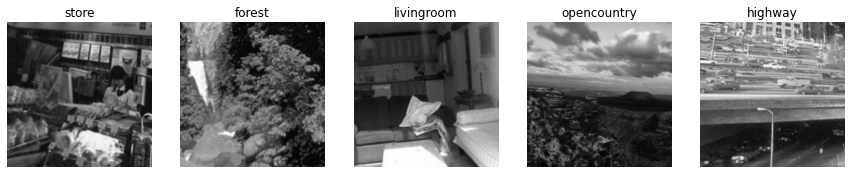

In [ ]:
dls.show_batch(nrows=1, ncols=5)

In [ ]:
learn = vision_learner(dls, resnet50, metrics=accuracy)

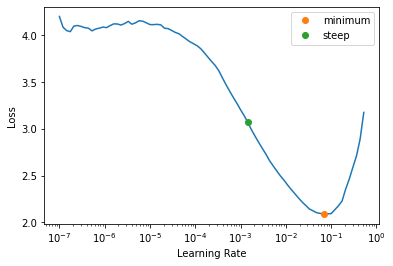

In [ ]:
lr_min,lr_steep = learn.lr_find(suggest_funcs=(minimum, steep))


In [ ]:
print(f"Minimum/10: {lr_min:.2e}, steepest point: {lr_steep:.2e}")

Minimum/10: 6.92e-03, steepest point: 1.45e-03


In [ ]:
learn.fit_one_cycle(3, 1e-3)

epoch,train_loss,valid_loss,accuracy,time
0,1.323493,0.408237,0.863333,00:29
1,0.688276,0.305238,0.894667,00:29
2,0.452909,0.290528,0.906667,00:29


In [ ]:
learn.unfreeze()

SuggestedLRs(valley=4.365158383734524e-05)

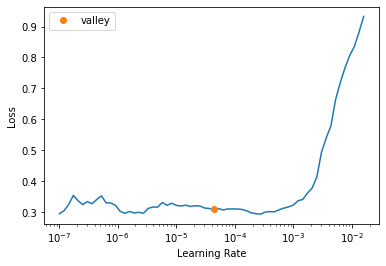

In [ ]:
learn.lr_find()

In [ ]:
learn.fit_one_cycle(10, lr_max=4e-5)

epoch,train_loss,valid_loss,accuracy,time
0,0.275309,0.272211,0.914000,00:37
1,0.264023,0.240186,0.920667,00:37
2,0.212343,0.255021,0.922667,00:37
3,0.167084,0.253421,0.918000,00:38
4,0.136848,0.256494,0.919333,00:37
5,0.108568,0.203911,0.932667,00:37
6,0.088884,0.198187,0.936667,00:37
7,0.074119,0.198271,0.936000,00:37
8,0.064894,0.199799,0.935333,00:38
9,0.055402,0.198118,0.934667,00:37


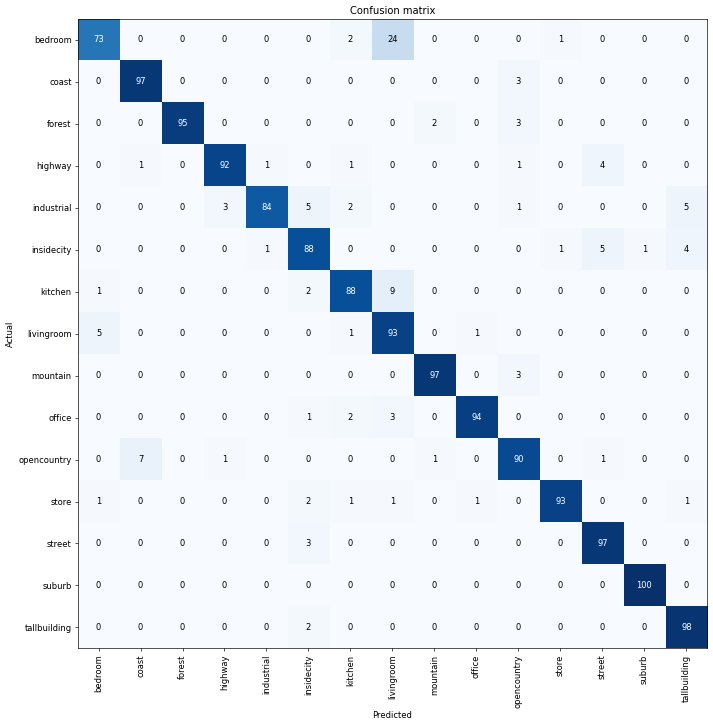

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

In [ ]:
interp.most_confused(min_val=5)

[('bedroom', 'livingroom', 24),
 ('kitchen', 'livingroom', 9),
 ('opencountry', 'coast', 7),
 ('industrial', 'insidecity', 5),
 ('industrial', 'tallbuilding', 5),
 ('insidecity', 'street', 5),
 ('livingroom', 'bedroom', 5)]

In [ ]:
learn = vision_learner(dls, resnet18, metrics=accuracy)
learn.fit_one_cycle(3, 3e-3)
learn.unfreeze()
learn.fit_one_cycle(10, lr_max=slice(6e-6,1e-5))


epoch,train_loss,valid_loss,accuracy,time
0,1.521945,0.687960,0.800667,00:16
1,0.806215,0.432586,0.870000,00:16
2,0.533546,0.335030,0.896000,00:15


epoch,train_loss,valid_loss,accuracy,time
0,0.368928,0.326155,0.897333,00:17
1,0.344234,0.319594,0.900667,00:18
2,0.318476,0.313824,0.901333,00:18
3,0.315878,0.297941,0.902667,00:17
4,0.307851,0.302107,0.905333,00:17
5,0.276704,0.299177,0.904000,00:17
6,0.269352,0.300965,0.904667,00:18
7,0.266139,0.292586,0.902667,00:17
8,0.256913,0.292216,0.905333,00:18
9,0.263991,0.301221,0.905333,00:17


In [ ]:
learn.fit_one_cycle(10, lr_max=slice(6e-7,1e-5))


epoch,train_loss,valid_loss,accuracy,time
0,0.304295,0.315414,0.908667,00:18
1,0.316390,0.319534,0.906000,00:18
2,0.322137,0.317702,0.909333,00:18
3,0.301082,0.320903,0.904000,00:18
4,0.292896,0.306920,0.908000,00:17
5,0.281521,0.303216,0.909333,00:17
6,0.269221,0.312383,0.909333,00:17
7,0.263937,0.307283,0.908667,00:17
8,0.269084,0.308938,0.911333,00:17
9,0.278894,0.307433,0.910667,00:17
